<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB9.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

# Panorama

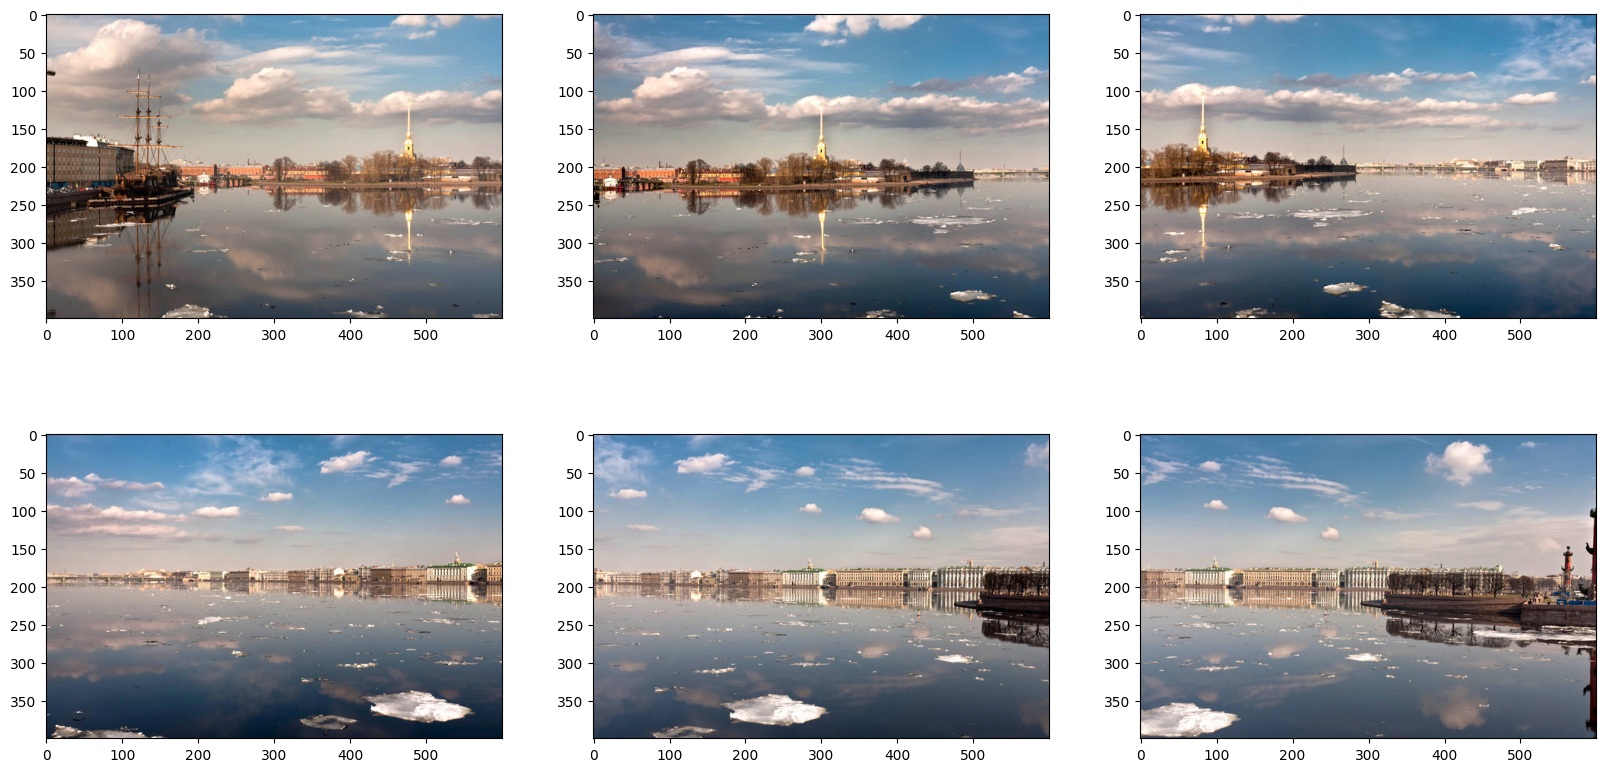

In [3]:
imagefiles = glob.glob(f"boat{os.sep}*")
imagefiles.sort()

images =[]
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

plt.figure(figsize=(20,10))
num_cols =3
num_rows = math.ceil(num_images/num_cols)
for i, img in enumerate(images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(img)

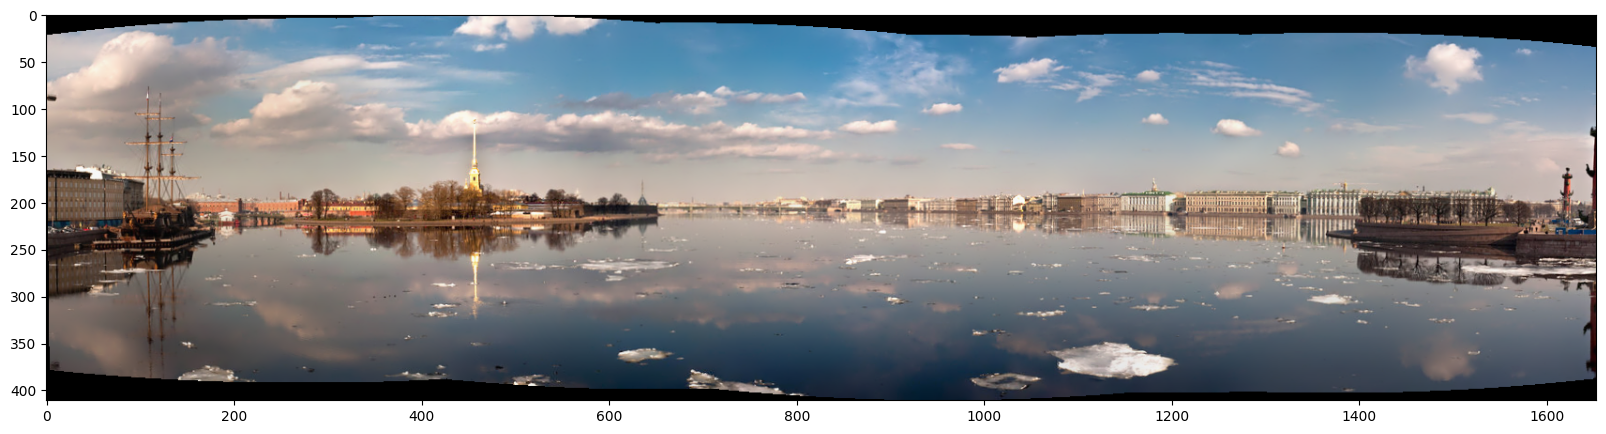

In [4]:
sticher = cv2.Stitcher.create()
status, stitched = sticher.stitch(images)

if status == cv2.Stitcher_OK:
    plt.figure(figsize=(20,10))
    plt.imshow(stitched)
else:
    print("Stitching failed")